In [1]:
root = "D:\Downloads\house-prices-advanced-regression-techniques"

import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(os.path.join(root, 'train.csv'))
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
all_columns = set(data.columns)

In [4]:
numeric_columns = set(data.select_dtypes(include=np.number).columns)

In [5]:
categorical_columns = all_columns.difference(numeric_columns)

In [6]:
data[categorical_columns]

,GarageQual,PavedDrive,Foundation,MasVnrType,BsmtExposure,RoofMatl,GarageFinish,Electrical,Functional,FireplaceQu,...,ExterCond,PoolQC,BsmtFinType2,CentralAir,Condition2,RoofStyle,MiscFeature,BldgType,Fence,Heating
0,TA,Y,PConc,BrkFace,No,CompShg,RFn,SBrkr,Typ,NaN,...,TA,NaN,Unf,Y,Norm,Gable,NaN,1Fam,NaN,GasA
1,TA,Y,CBlock,None,Gd,CompShg,RFn,SBrkr,Typ,TA,...,TA,NaN,Unf,Y,Norm,Gable,NaN,1Fam,NaN,GasA
2,TA,Y,PConc,BrkFace,Mn,CompShg,RFn,SBrkr,Typ,TA,...,TA,NaN,Unf,Y,Norm,Gable,NaN,1Fam,NaN,GasA
3,TA,Y,BrkTil,None,No,CompShg,Unf,SBrkr,Typ,Gd,...,TA,NaN,Unf,Y,Norm,Gable,NaN,1Fam,NaN,GasA
4,TA,Y,PConc,BrkFace,Av,CompShg,RFn,SBrkr,Typ,TA,...,TA,NaN,Unf,Y,Norm,Gable,NaN,1Fam,NaN,GasA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,TA,Y,PConc,None,No,CompShg,RFn,SBrkr,Typ,TA,...,TA,NaN,Unf,Y,Norm,Gable,NaN,1Fam,NaN,GasA
1456,TA,Y,CBlock,Stone,No,CompShg,Unf,SBrkr,Min1,TA,...,TA,NaN,Rec,Y,Norm,Gable,NaN,1Fam,MnPrv,GasA
1457,TA,Y,Stone,None,No,CompShg,RFn,SBrkr,Typ,Gd,...,Gd,NaN,Unf,Y,Norm,Gable,Shed,1Fam,GdPrv,GasA
1458,TA,Y,CBlock,None,Mn,CompShg,Unf,FuseA,Typ,NaN,...,TA,NaN,Rec,Y,Norm,Hip,NaN,1Fam,NaN,GasA


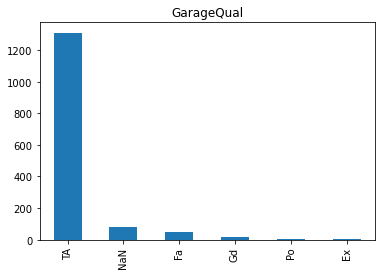

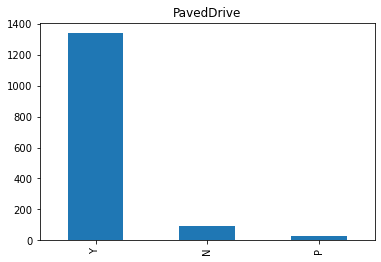

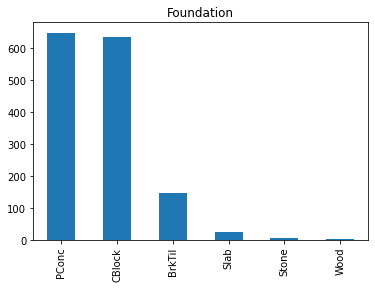

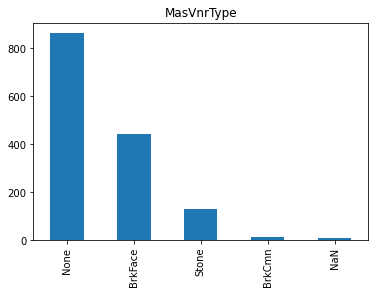

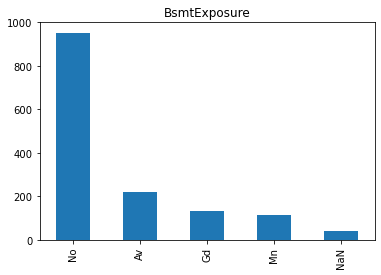

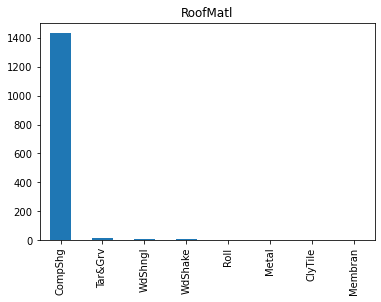

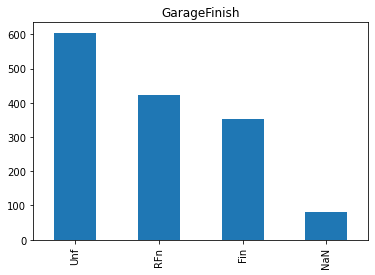

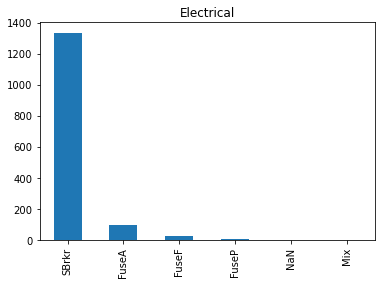

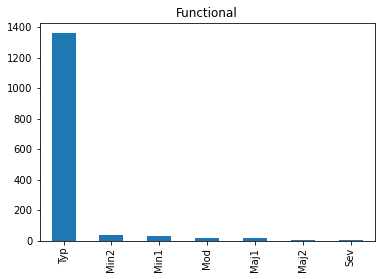

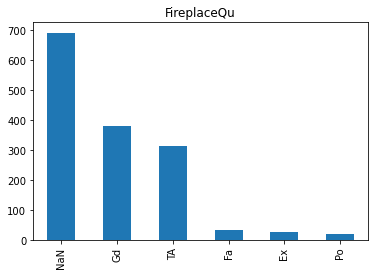

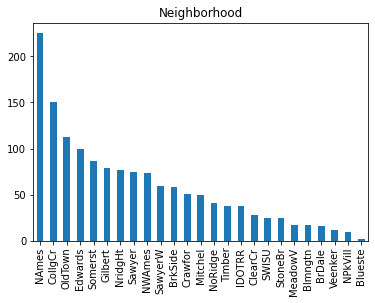

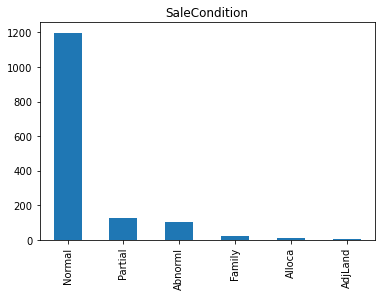

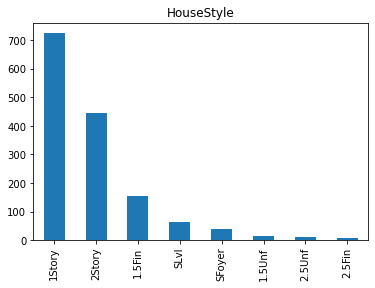

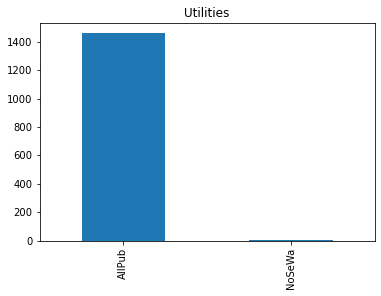

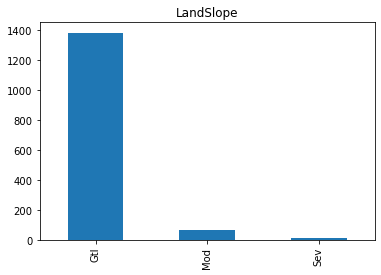

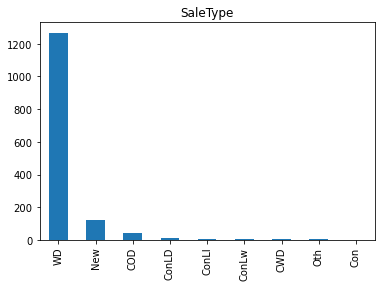

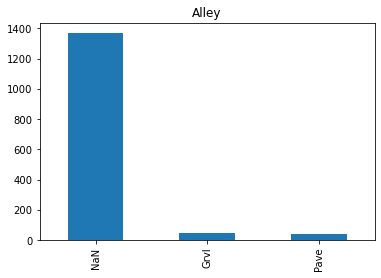

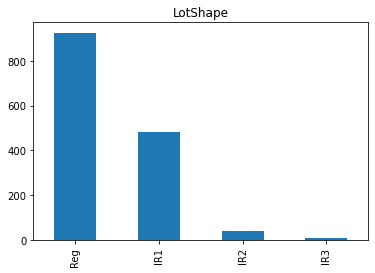

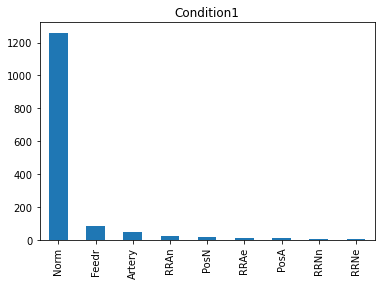

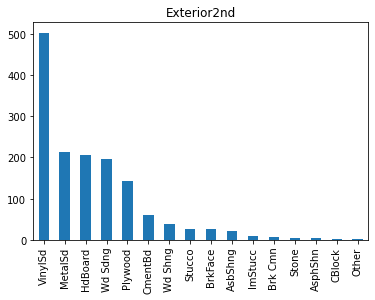

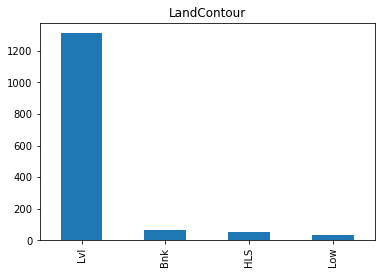

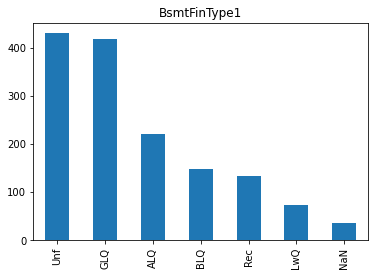

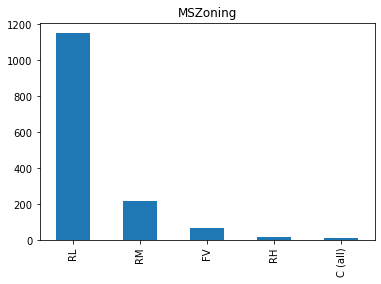

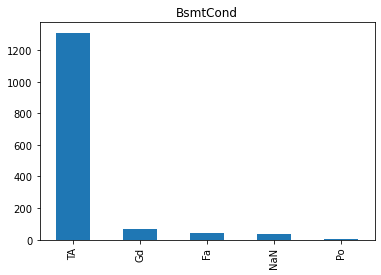

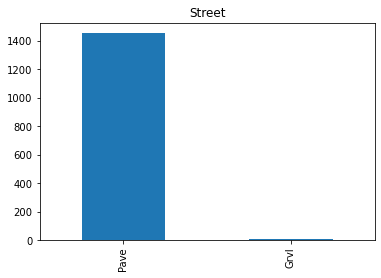

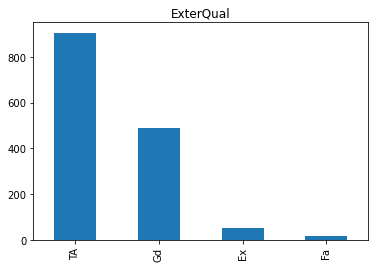

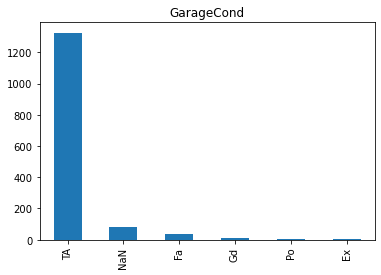

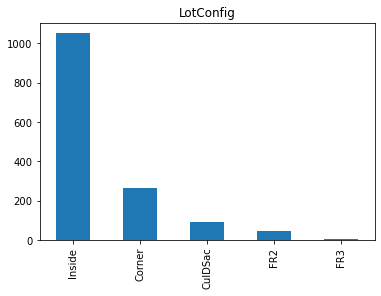

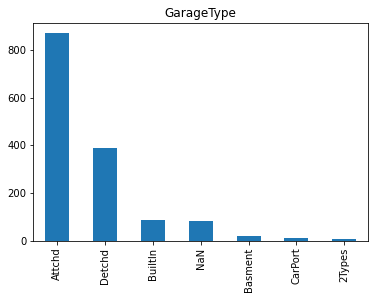

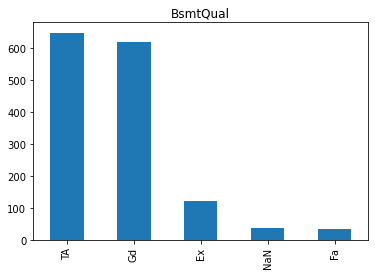

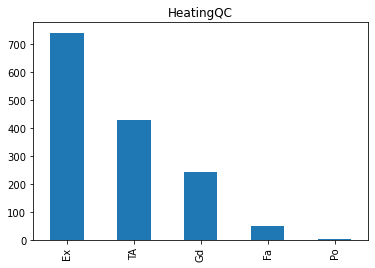

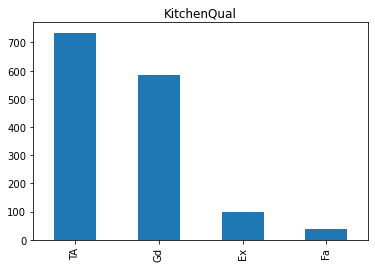

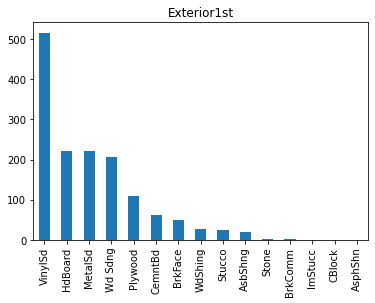

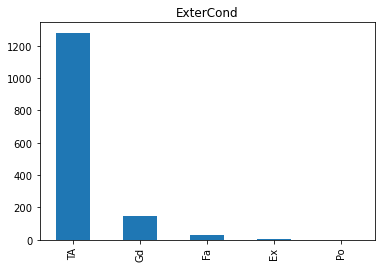

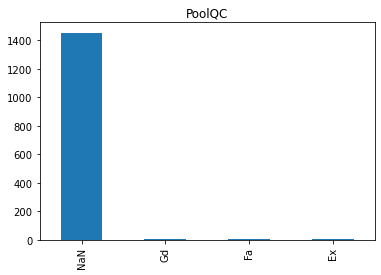

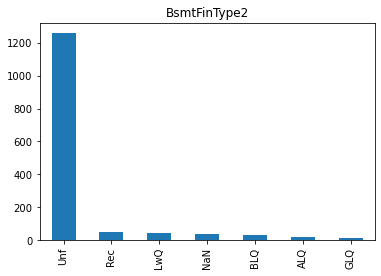

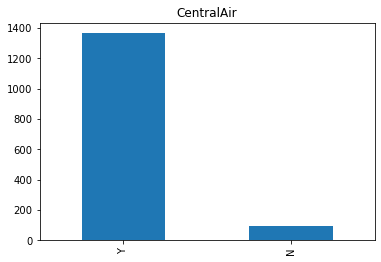

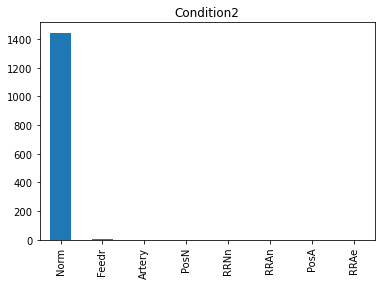

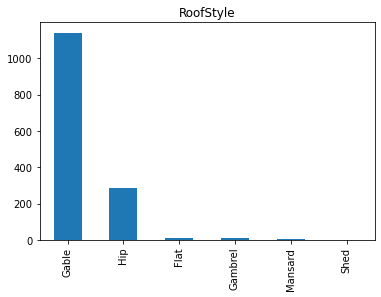

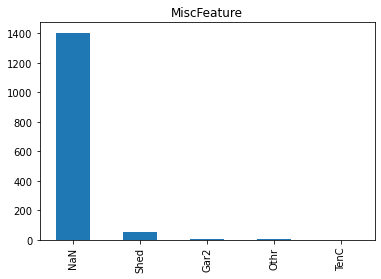

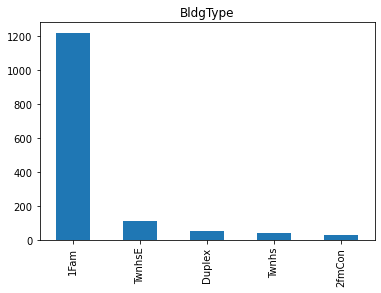

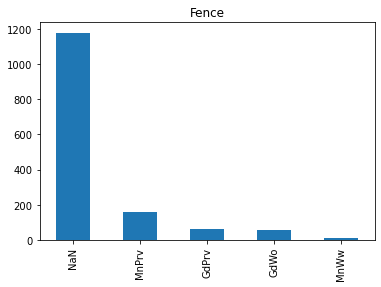

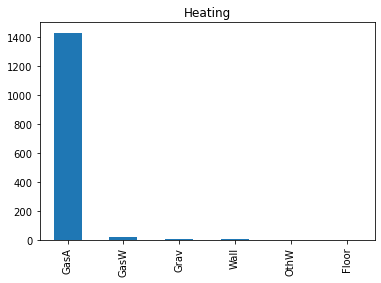

In [7]:
dt = data.copy()
for column in categorical_columns:
    dt[column] = dt[column].fillna("NaN")
    dt[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.show()

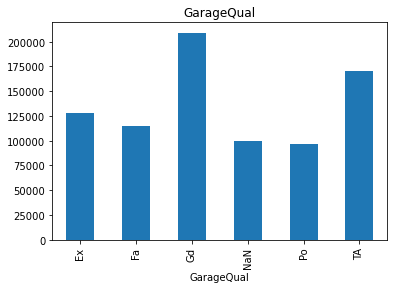

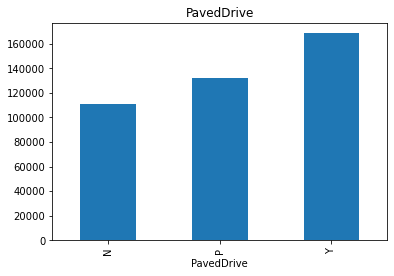

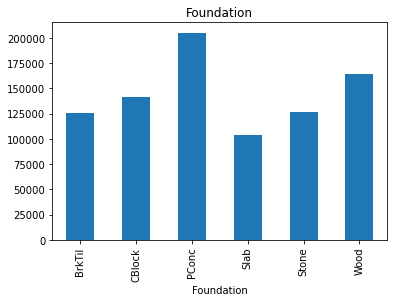

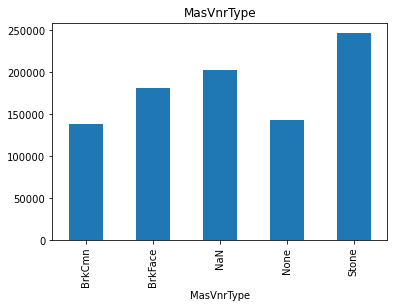

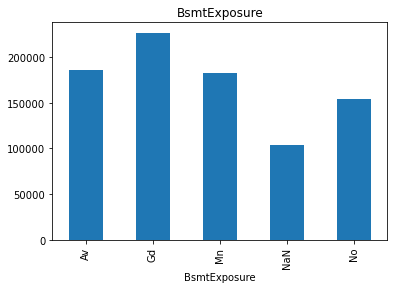

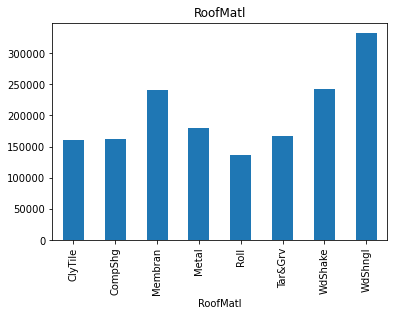

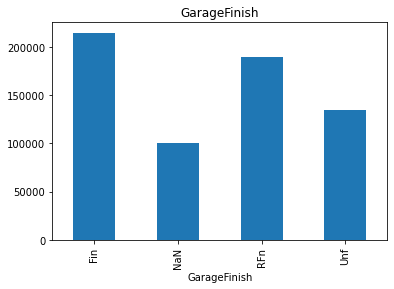

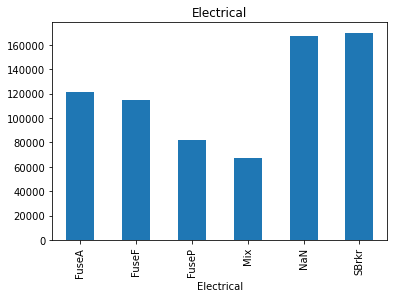

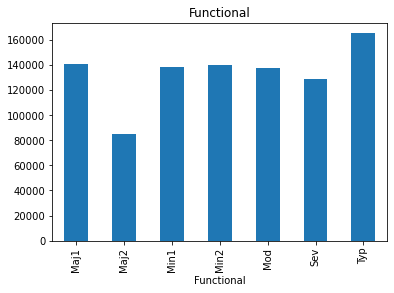

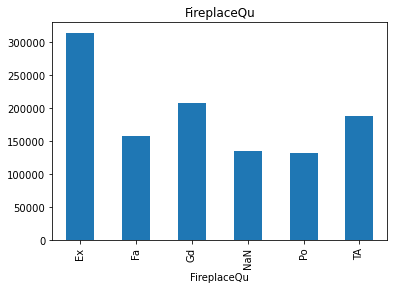

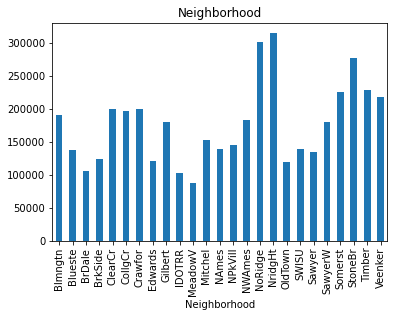

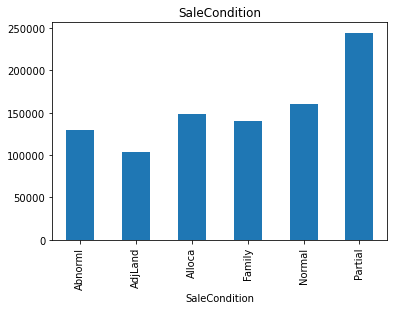

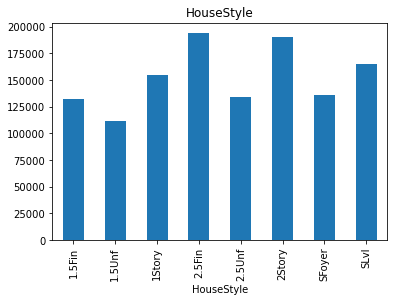

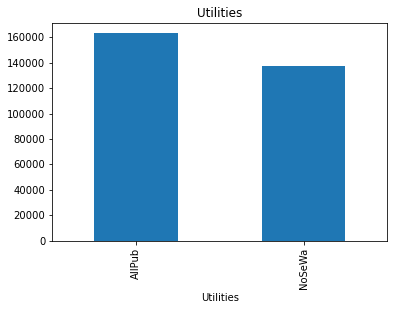

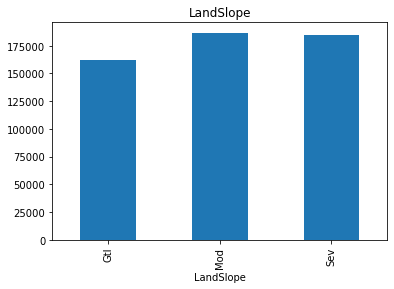

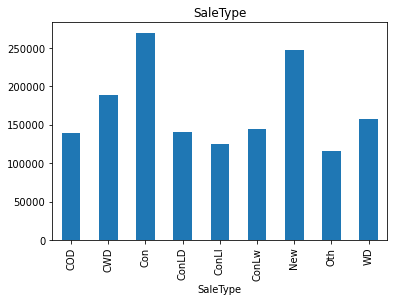

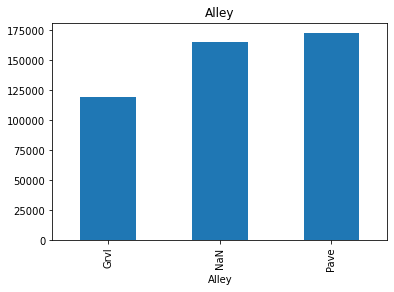

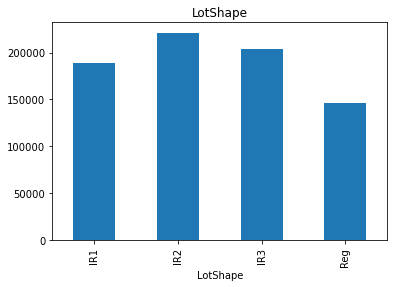

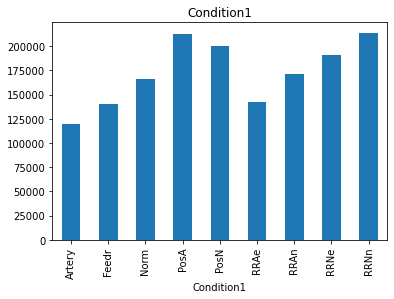

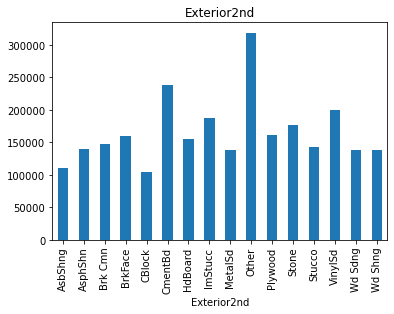

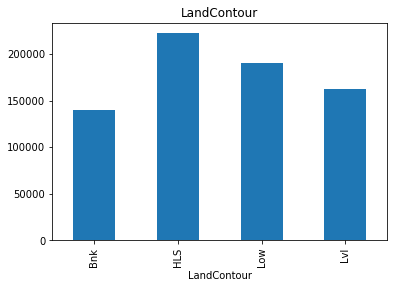

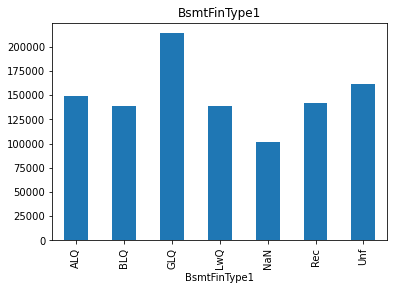

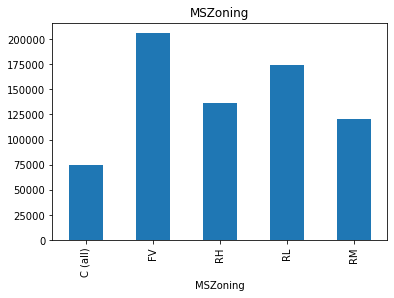

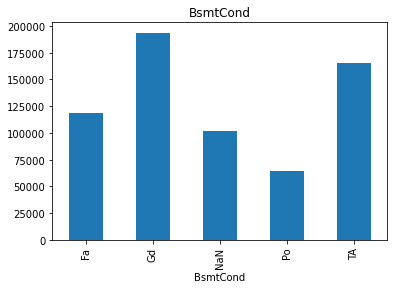

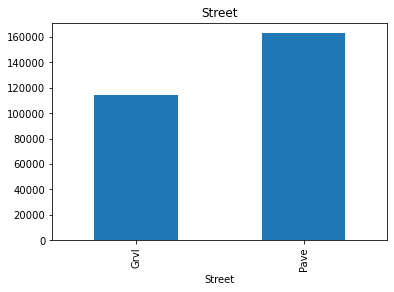

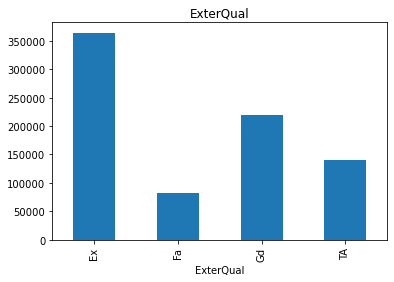

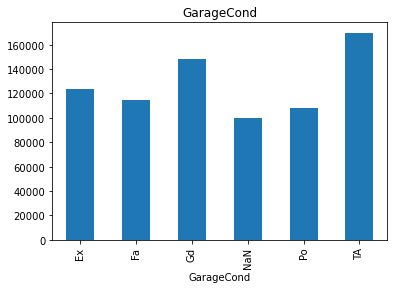

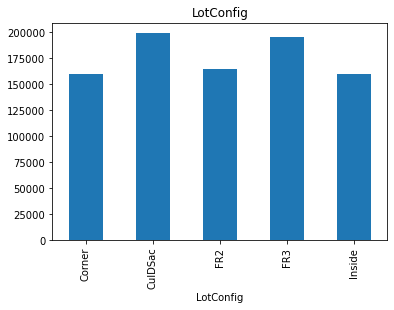

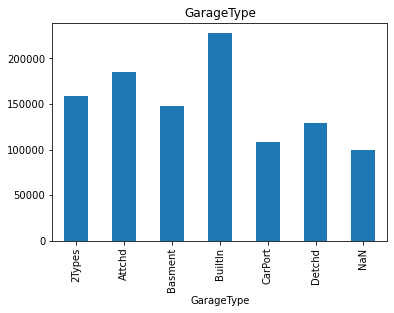

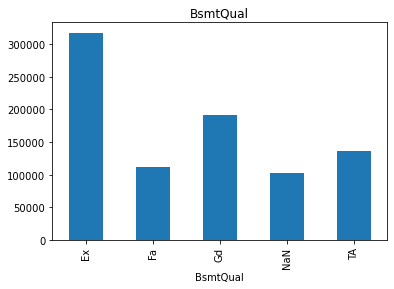

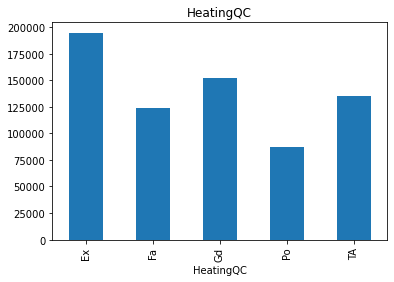

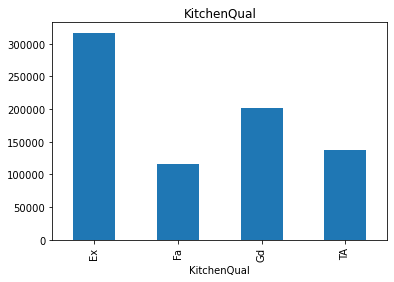

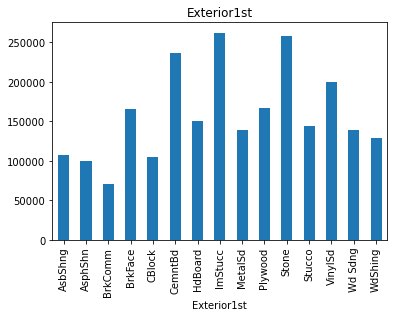

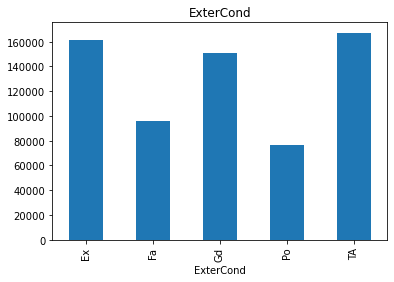

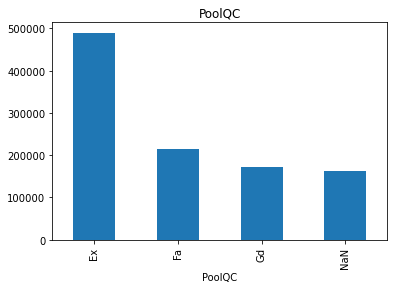

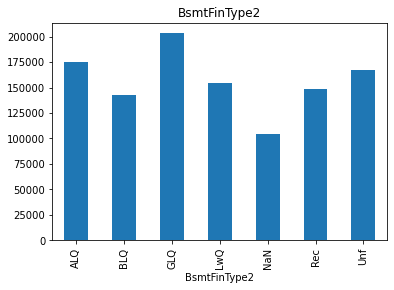

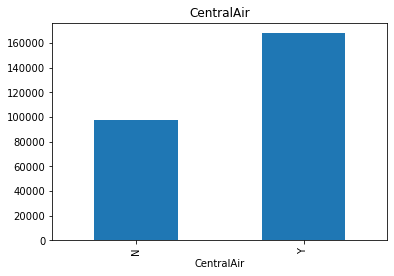

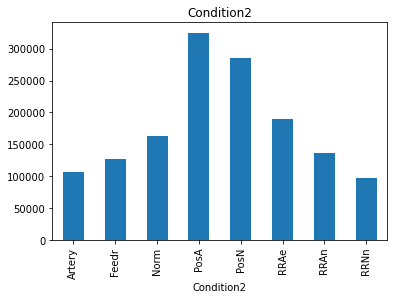

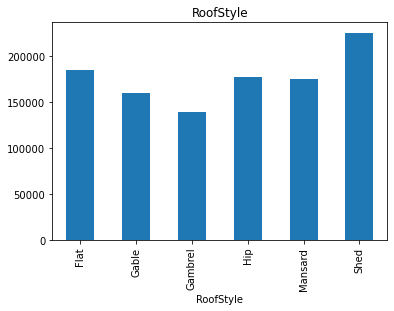

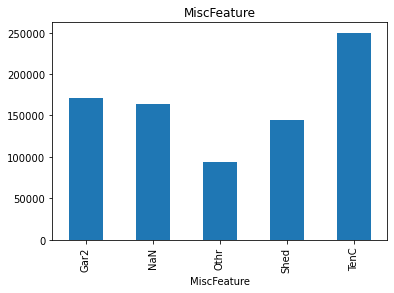

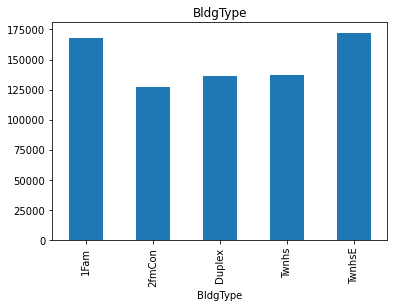

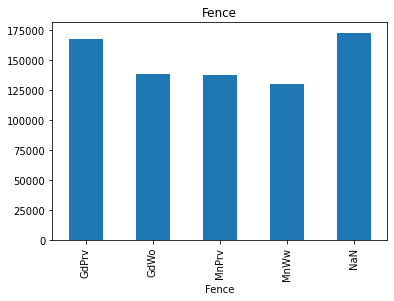

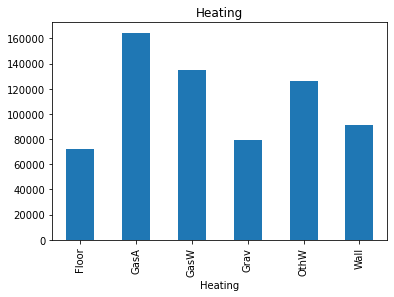

In [8]:
for column in categorical_columns:
    dt.groupby(column)['SalePrice'].median().plot(kind='bar')
    plt.title(column)
    plt.show()

In [9]:
for column in categorical_columns:
    medians_by_column = dt.groupby(column)['SalePrice'].median()
    sort_list = medians_by_column.sort_values().index.tolist()
    dt[column] = pd.Categorical(dt[column], categories=sort_list)
    dt.sort_values(column, inplace=True)
    dt[column] = dt[column].factorize()[0]
dt = dt.sort_values('Id')
dt

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,1,0,1,1,...,0,0,4,2,0,2,2008,5,4,208500
1,2,20,3,80.0,9600,1,1,0,1,1,...,0,0,4,2,0,5,2007,5,4,181500
2,3,60,3,68.0,11250,1,1,1,1,1,...,0,0,4,2,0,9,2008,5,4,223500
3,4,70,3,60.0,9550,1,1,1,1,1,...,0,0,4,2,0,2,2006,5,1,140000
4,5,60,3,84.0,14260,1,1,1,1,1,...,0,0,4,2,0,12,2008,5,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,1,0,1,1,...,0,0,4,2,0,8,2007,5,4,175000
1456,1457,20,3,85.0,13175,1,1,0,1,1,...,0,0,1,2,0,2,2010,5,4,210000
1457,1458,70,3,66.0,9042,1,1,0,1,1,...,0,0,3,1,2500,5,2010,5,4,266500
1458,1459,20,3,68.0,9717,1,1,0,1,1,...,0,0,4,2,0,4,2010,5,4,142125


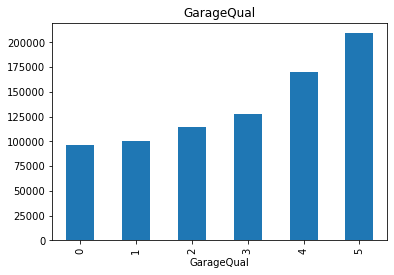

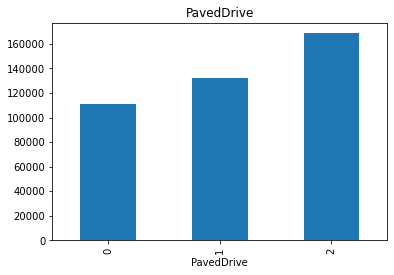

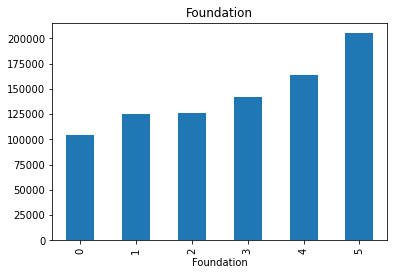

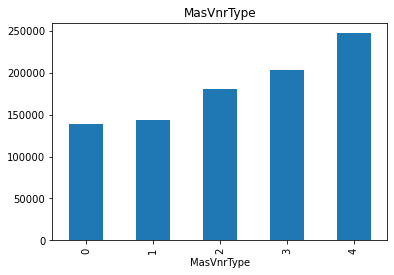

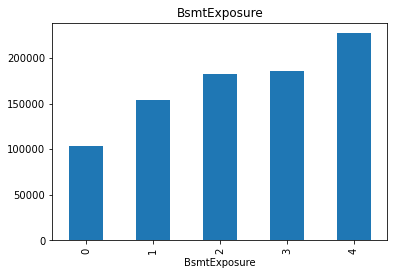

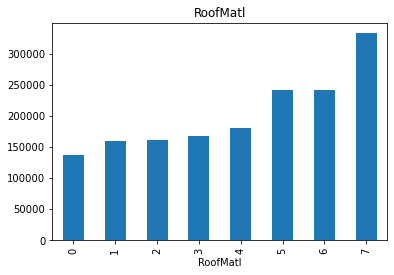

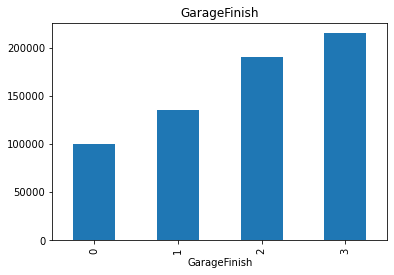

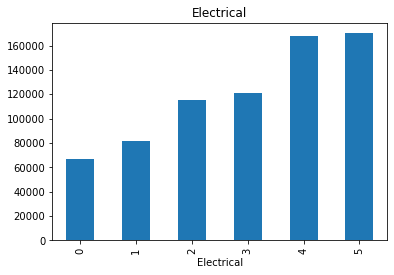

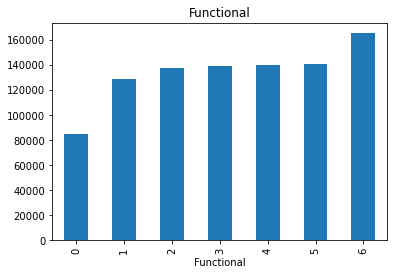

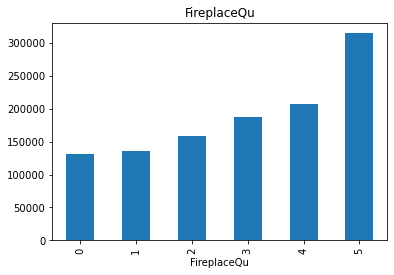

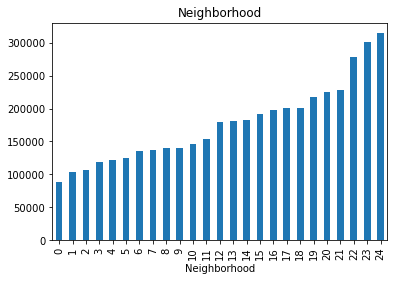

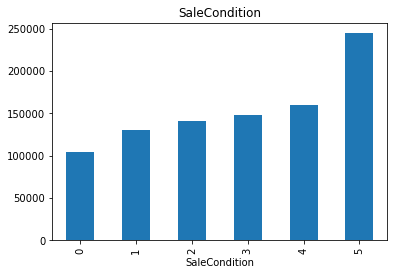

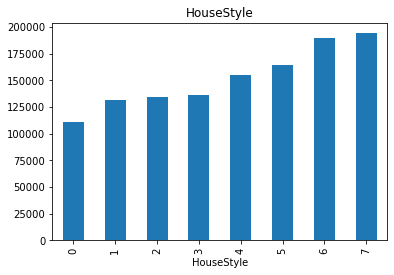

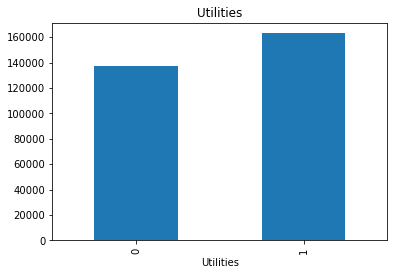

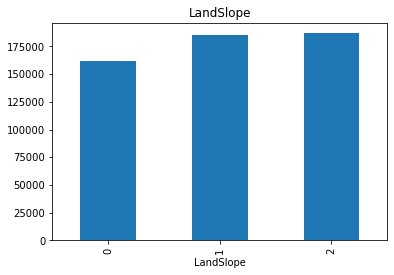

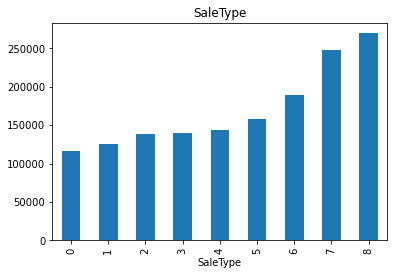

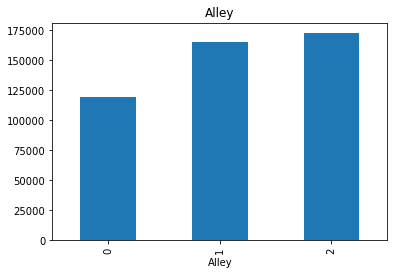

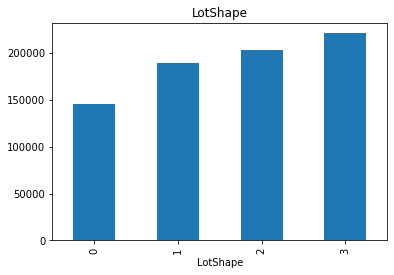

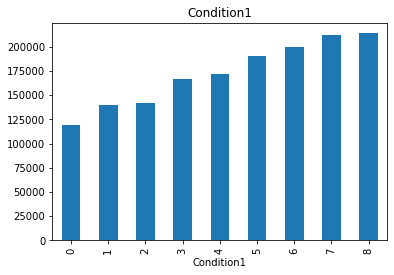

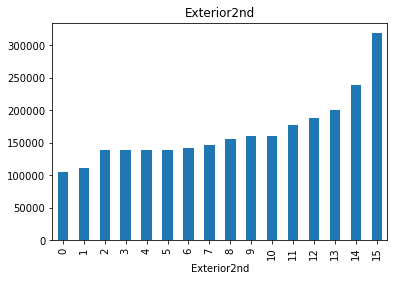

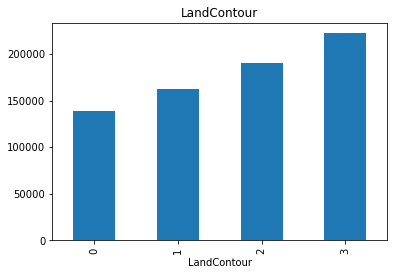

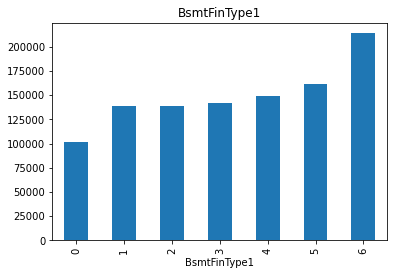

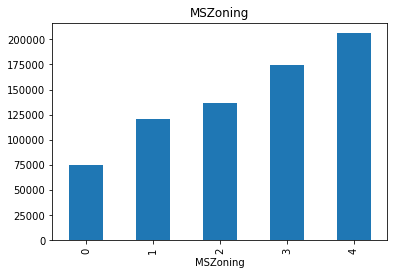

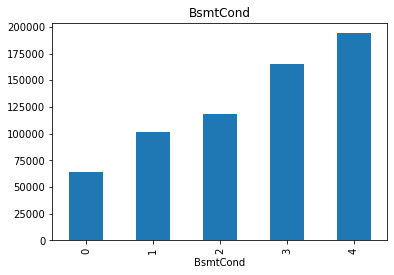

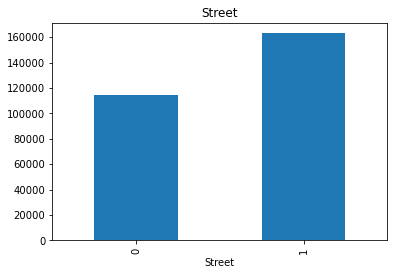

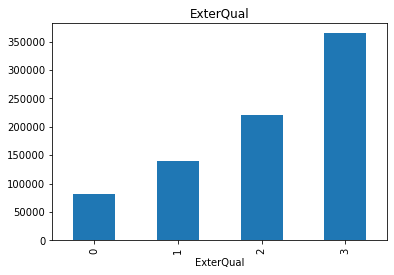

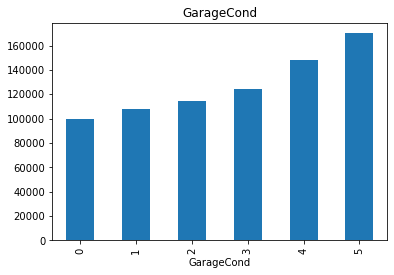

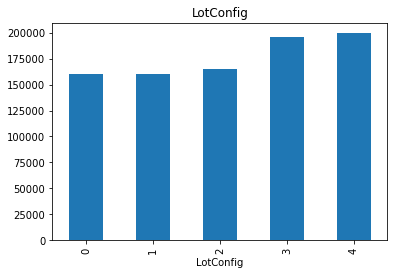

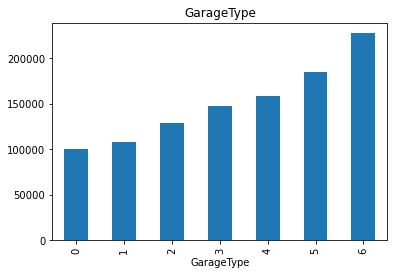

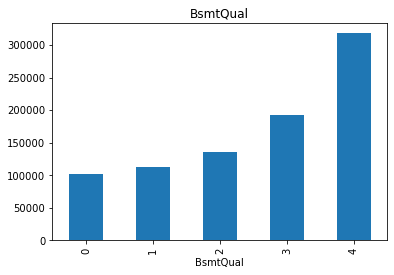

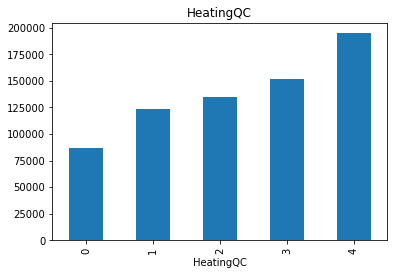

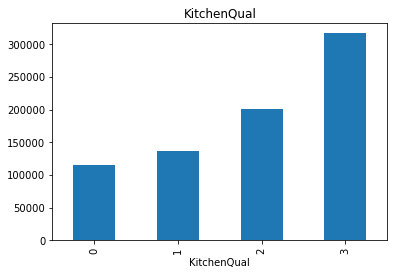

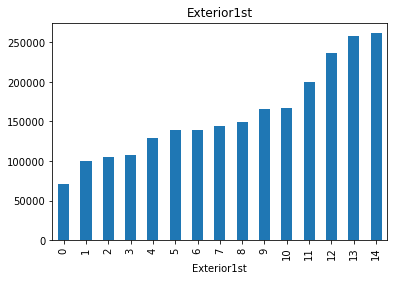

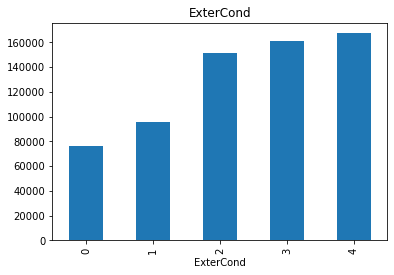

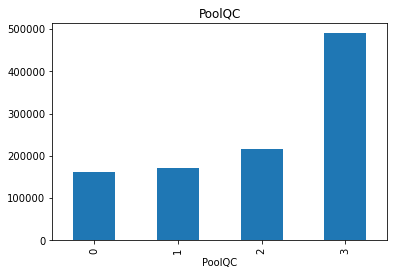

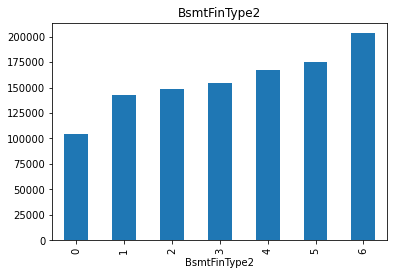

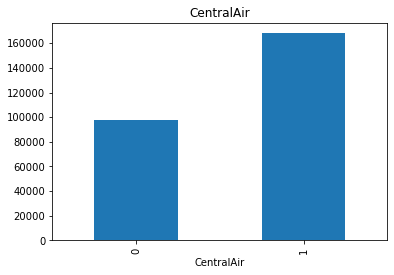

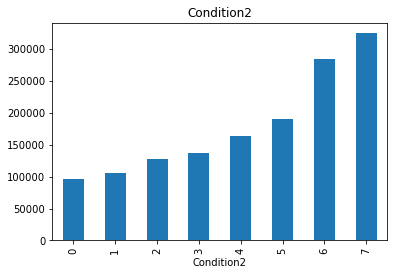

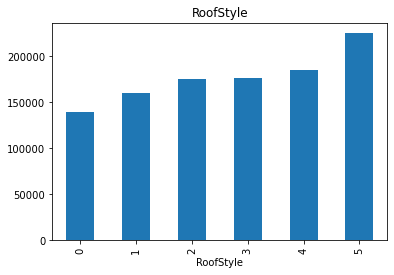

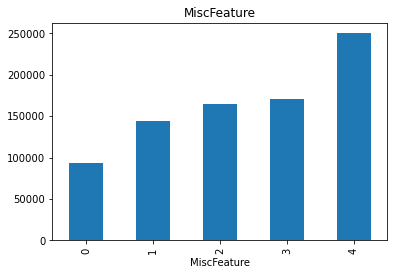

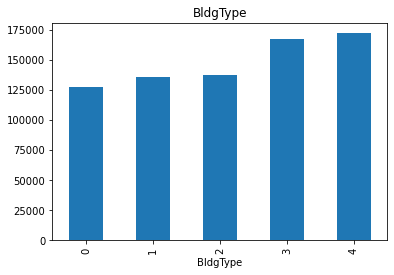

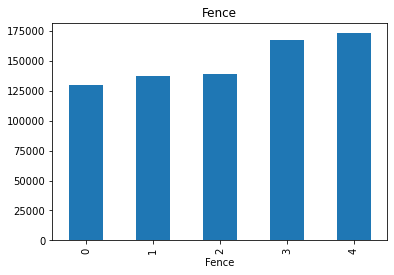

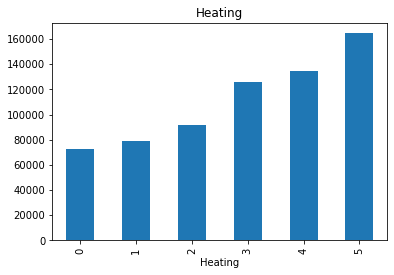

In [10]:
for column in categorical_columns:
    dt.groupby(column)['SalePrice'].median().plot(kind='bar')
    plt.title(column)
    plt.show()

In [11]:
dt[categorical_columns].isnull().sum().sum()

0

In [12]:
dt[numeric_columns].isnull().sum()

TotalBsmtSF        0
LotFrontage      259
MoSold             0
MSSubClass         0
HalfBath           0
EnclosedPorch      0
BsmtFullBath       0
Id                 0
PoolArea           0
MiscVal            0
3SsnPorch          0
BsmtFinSF1         0
WoodDeckSF         0
YearBuilt          0
OpenPorchSF        0
GarageArea         0
GarageCars         0
ScreenPorch        0
OverallCond        0
SalePrice          0
BsmtHalfBath       0
Fireplaces         0
1stFlrSF           0
GarageYrBlt       81
BedroomAbvGr       0
YrSold             0
FullBath           0
TotRmsAbvGrd       0
KitchenAbvGr       0
MasVnrArea         8
2ndFlrSF           0
GrLivArea          0
BsmtUnfSF          0
LotArea            0
OverallQual        0
LowQualFinSF       0
YearRemodAdd       0
BsmtFinSF2         0
dtype: int64

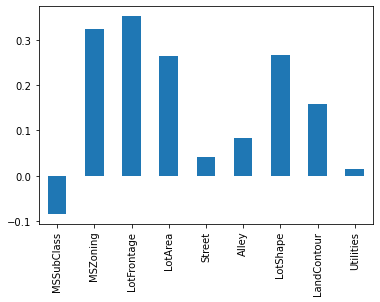

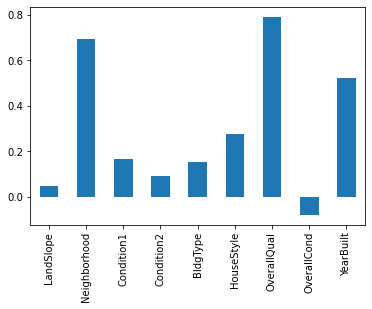

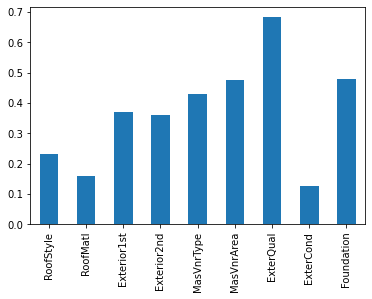

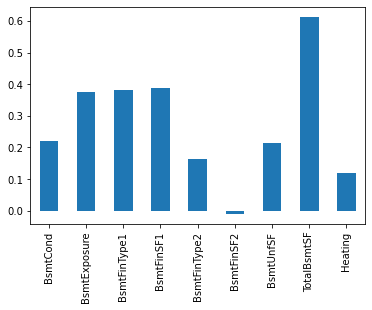

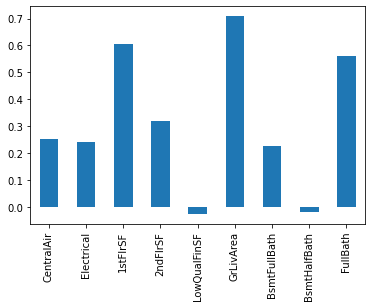

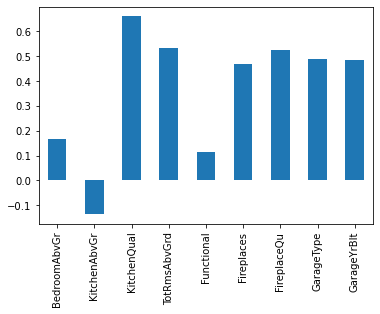

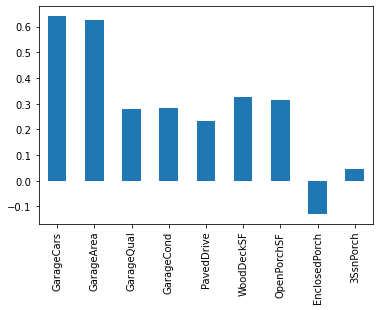

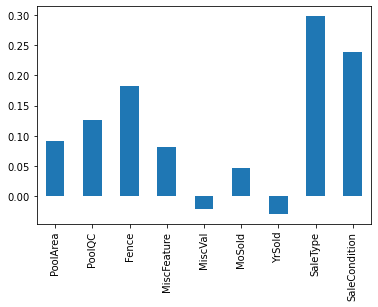

In [13]:
for i in range(0, len(all_columns)-1, 10):
    dt.corr(method ='pearson')['SalePrice'][i+1:i+10].plot(kind='bar')
    plt.show()

In [14]:
dt

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,1,0,1,1,...,0,0,4,2,0,2,2008,5,4,208500
1,2,20,3,80.0,9600,1,1,0,1,1,...,0,0,4,2,0,5,2007,5,4,181500
2,3,60,3,68.0,11250,1,1,1,1,1,...,0,0,4,2,0,9,2008,5,4,223500
3,4,70,3,60.0,9550,1,1,1,1,1,...,0,0,4,2,0,2,2006,5,1,140000
4,5,60,3,84.0,14260,1,1,1,1,1,...,0,0,4,2,0,12,2008,5,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,1,0,1,1,...,0,0,4,2,0,8,2007,5,4,175000
1456,1457,20,3,85.0,13175,1,1,0,1,1,...,0,0,1,2,0,2,2010,5,4,210000
1457,1458,70,3,66.0,9042,1,1,0,1,1,...,0,0,3,1,2500,5,2010,5,4,266500
1458,1459,20,3,68.0,9717,1,1,0,1,1,...,0,0,4,2,0,4,2010,5,4,142125


In [15]:
to_drop_columns = [column for column in dt.columns if column in dt and np.abs(dt.corr(method ='pearson')['SalePrice'][column]) < 0.1]
to_drop_columns

['Id',
 'MSSubClass',
 'Street',
 'Alley',
 'Utilities',
 'LandSlope',
 'Condition2',
 'OverallCond',
 'BsmtFinSF2',
 'LowQualFinSF',
 'BsmtHalfBath',
 '3SsnPorch',
 'PoolArea',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'YrSold']

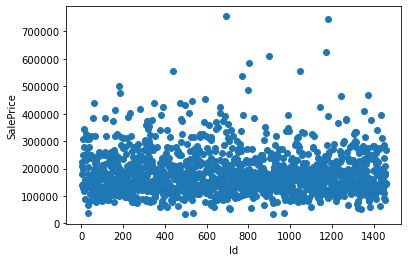

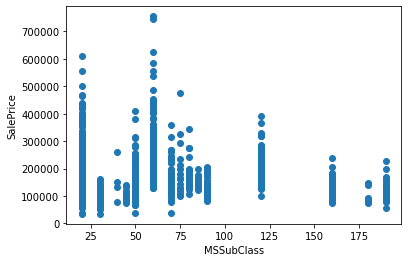

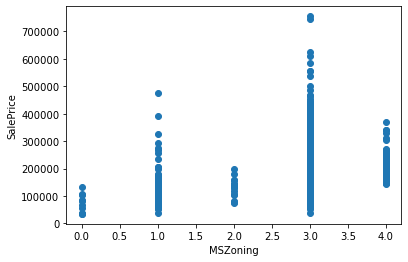

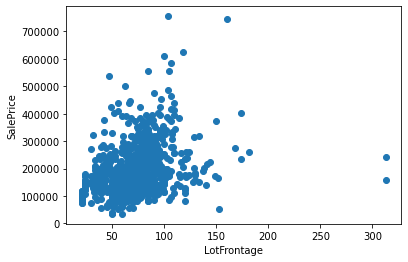

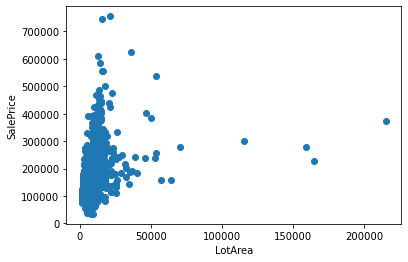

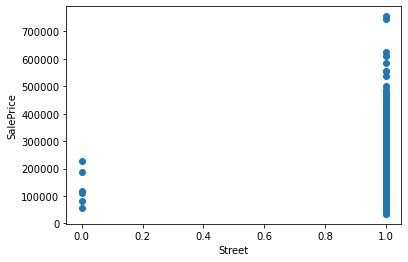

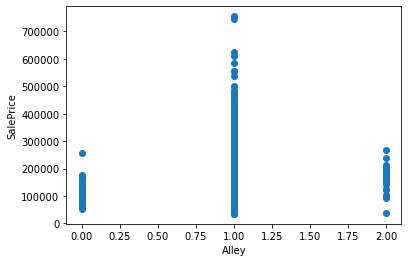

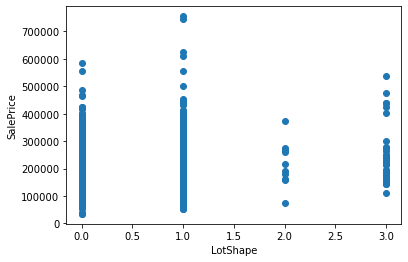

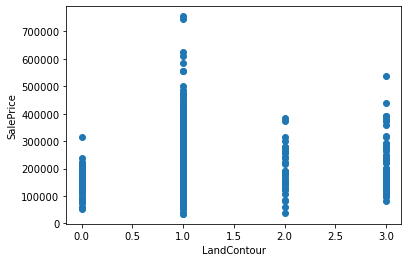

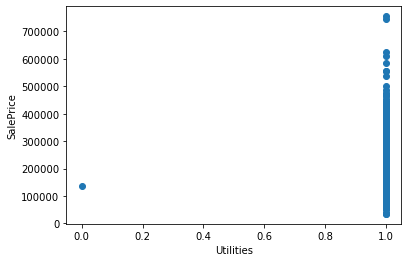

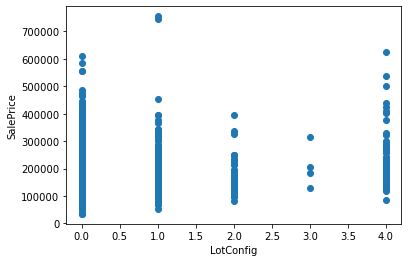

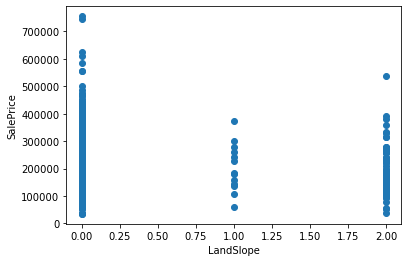

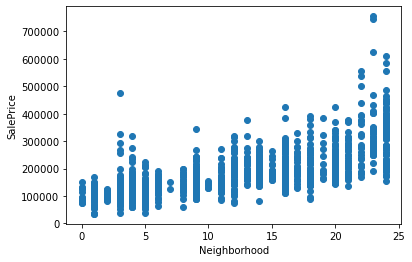

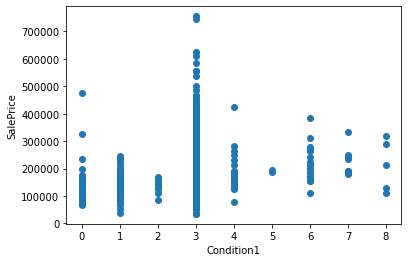

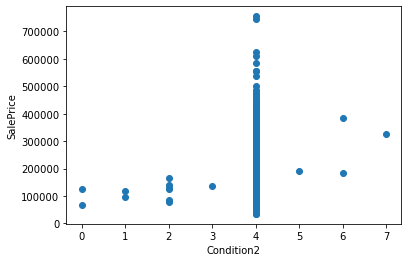

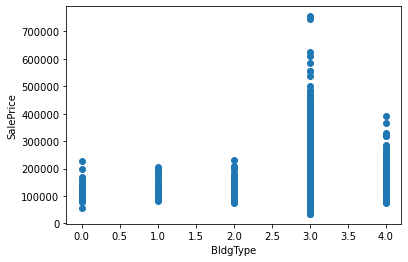

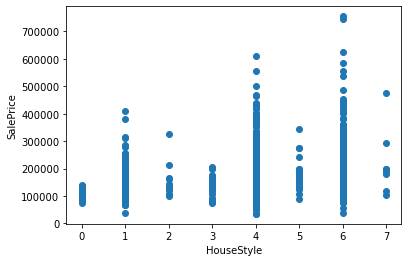

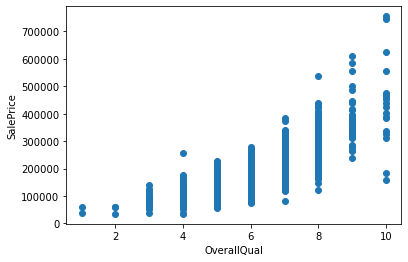

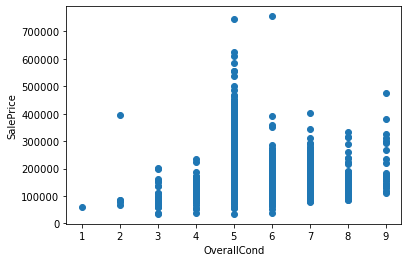

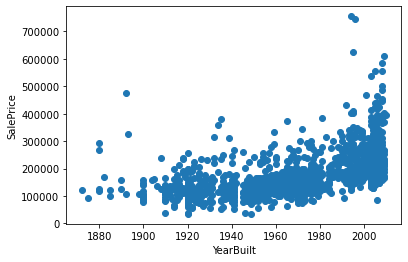

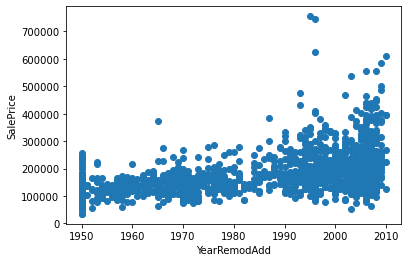

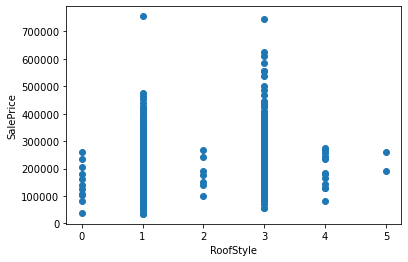

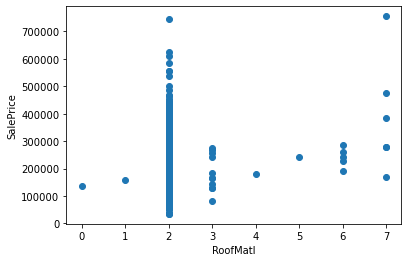

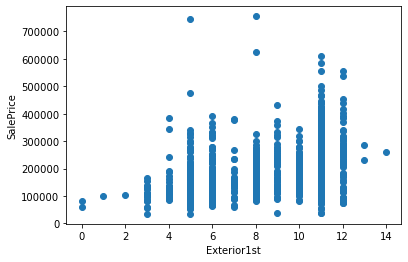

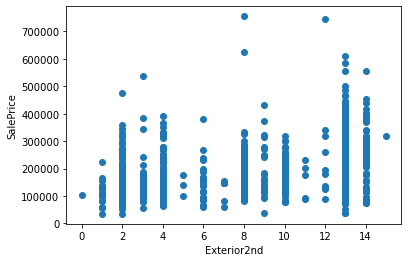

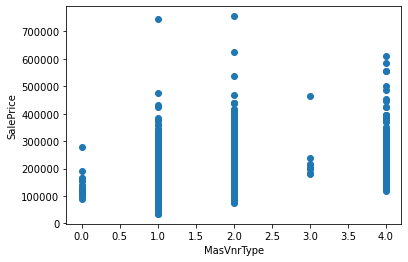

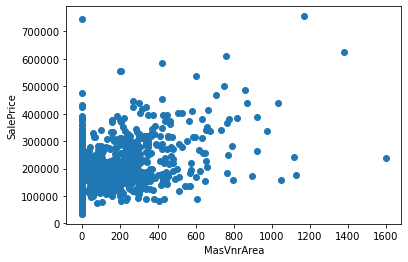

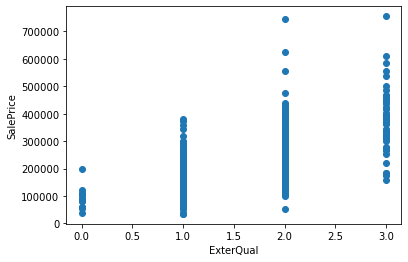

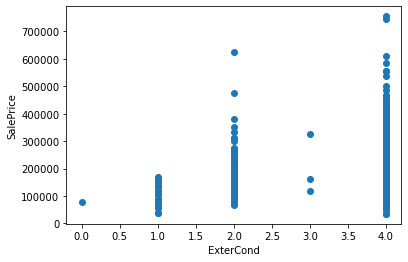

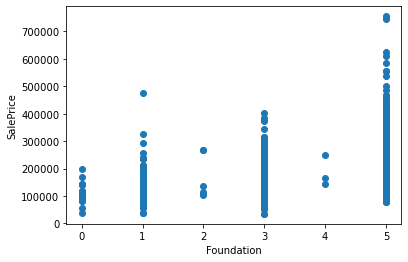

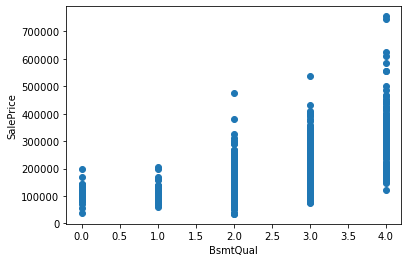

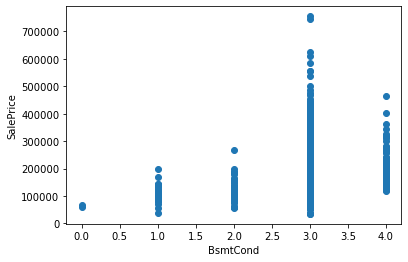

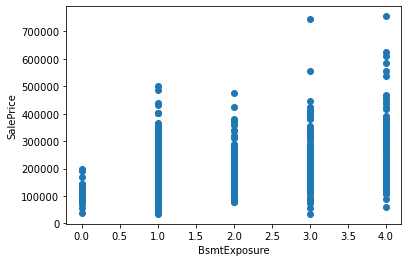

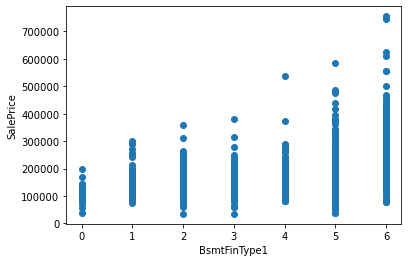

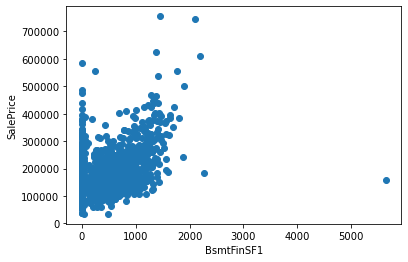

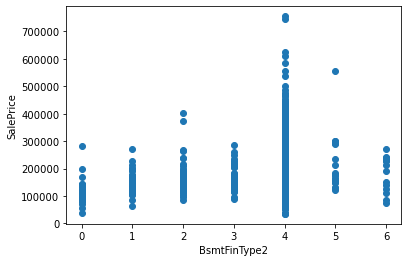

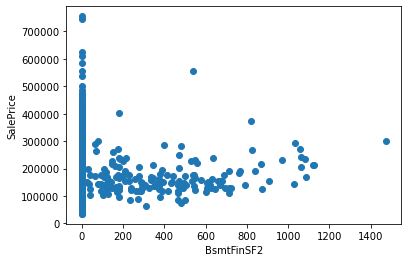

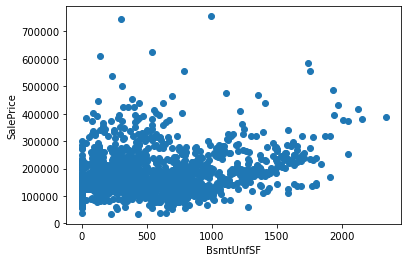

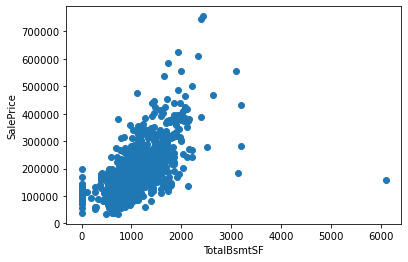

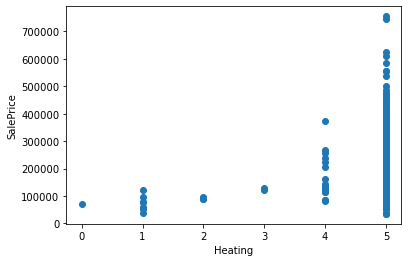

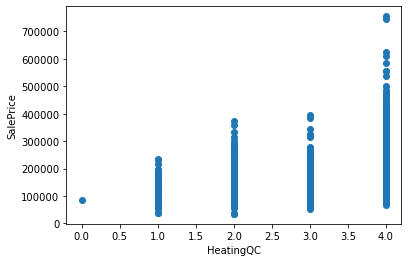

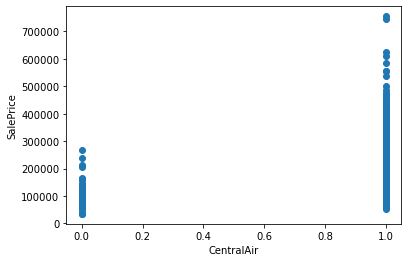

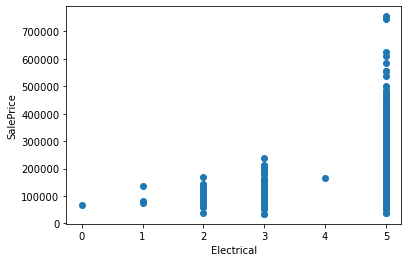

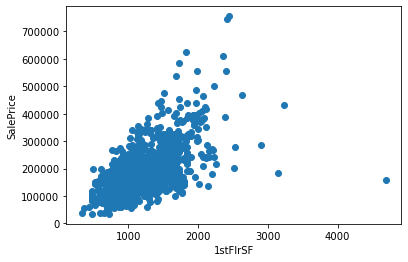

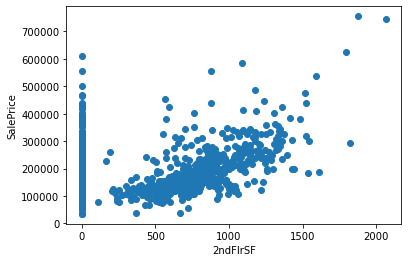

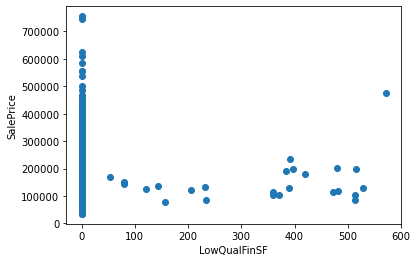

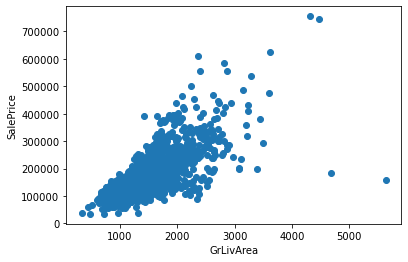

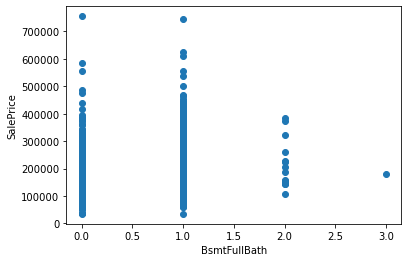

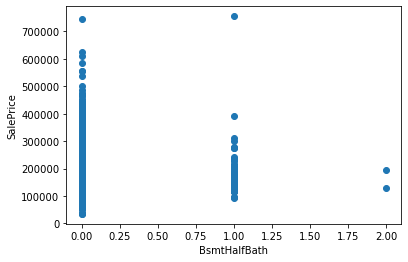

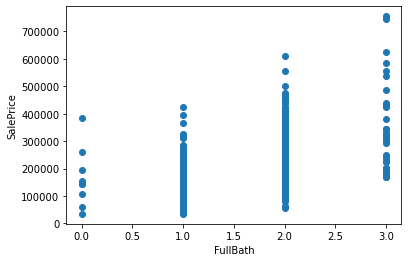

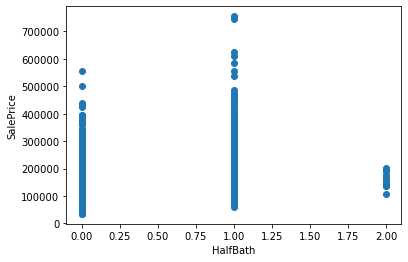

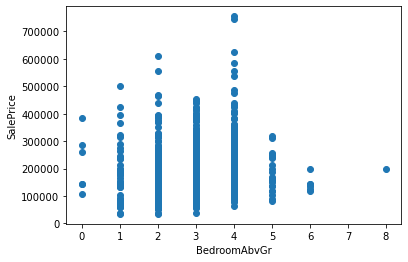

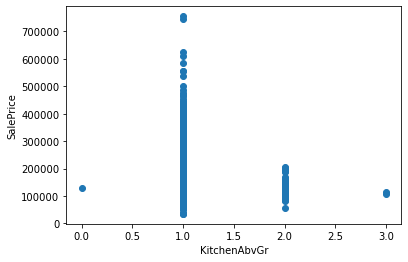

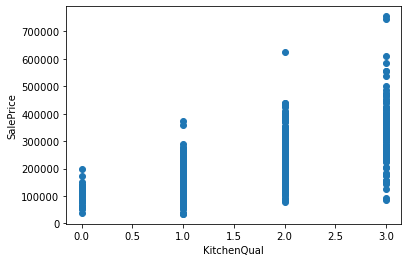

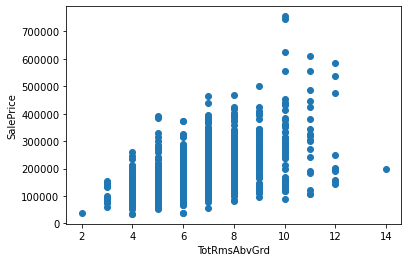

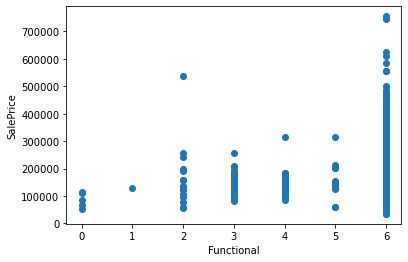

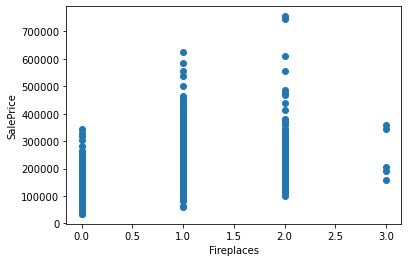

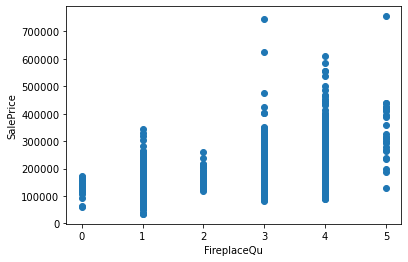

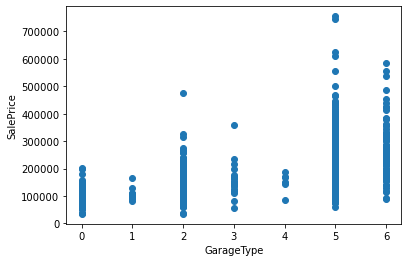

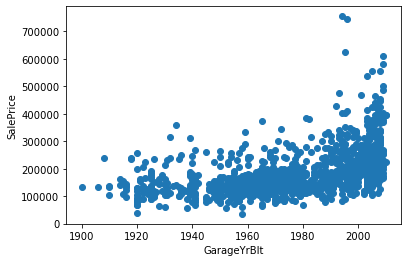

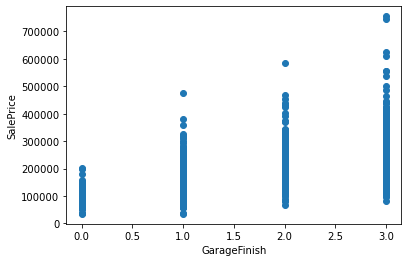

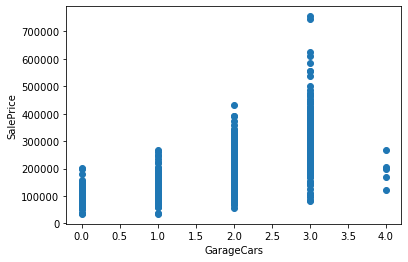

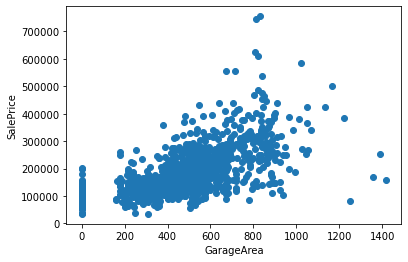

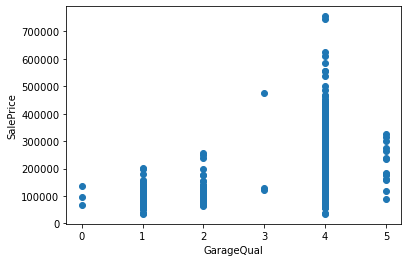

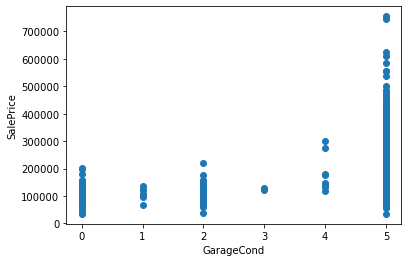

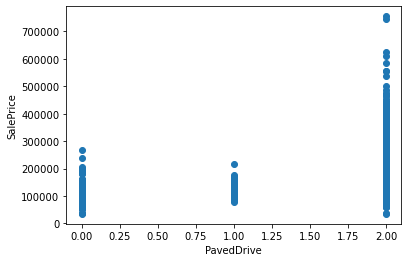

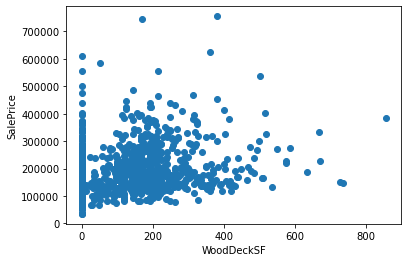

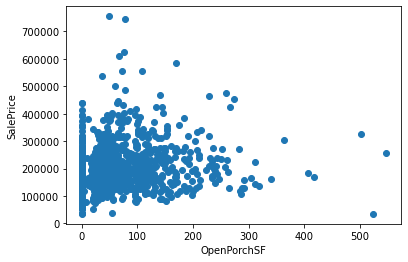

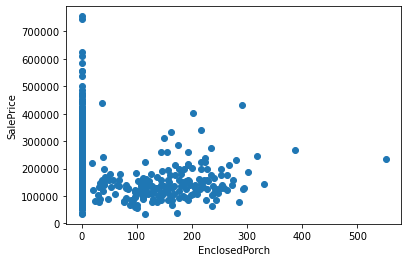

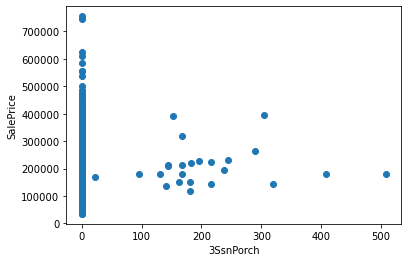

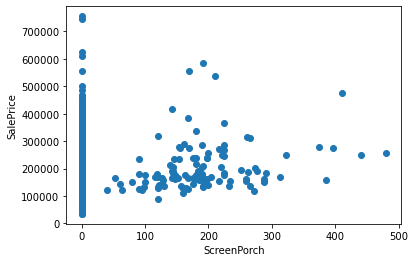

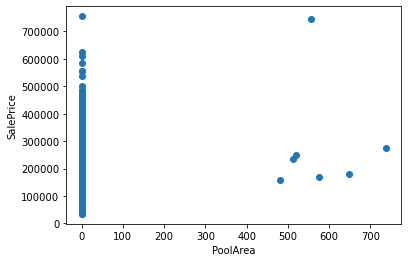

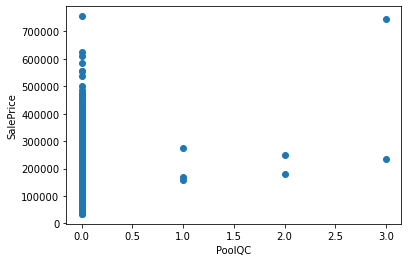

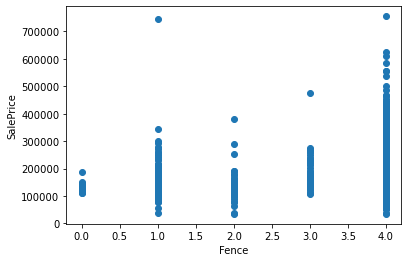

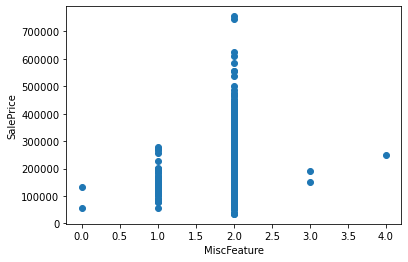

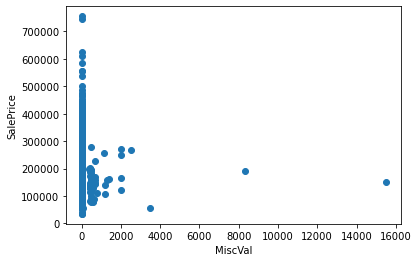

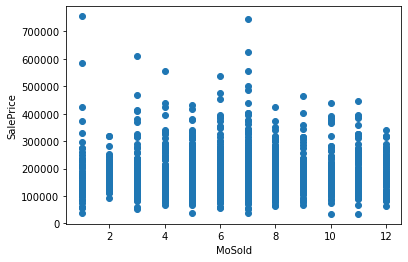

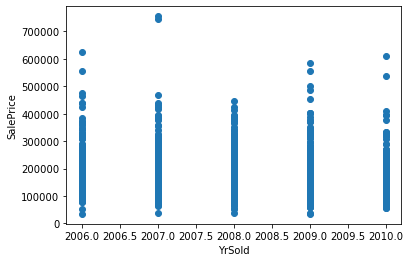

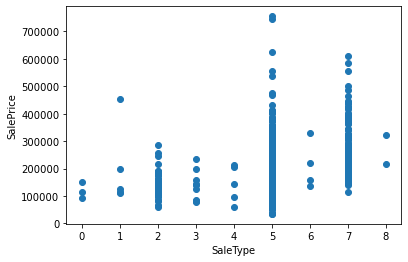

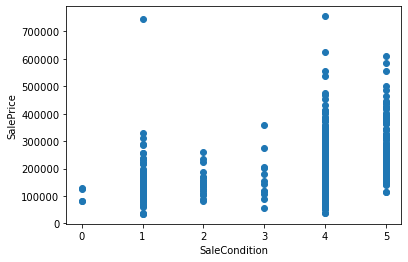

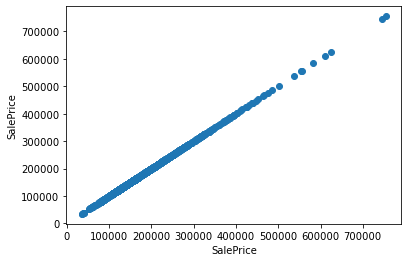

In [16]:
for column in dt.columns:
    plt.scatter(dt[column], dt['SalePrice'])
    plt.xlabel(column)
    plt.ylabel('SalePrice')
    plt.show()

в некоторых колонках (например BsmtFinSF2) много нулей занмающих весь диапазон цен, что может сбивать

In [18]:
null_columns = [column for column in dt[numeric_columns] if dt[column].isnull().sum()>0]
null_columns

['LotFrontage', 'GarageYrBlt', 'MasVnrArea']

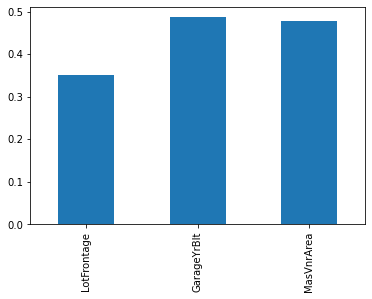

In [19]:
dt.corr(method ='pearson')['SalePrice'][null_columns].plot(kind='bar')
plt.show()

In [20]:
for column in null_columns:
    column_median = dt[column].median()
    dt[column] = dt[column].fillna(column_median)

In [21]:
dt[numeric_columns].isnull().sum().sum()

0

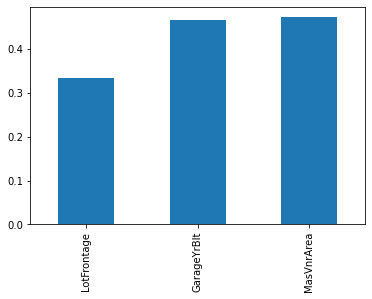

In [22]:
dt.corr(method ='pearson')['SalePrice'][null_columns].plot(kind='bar')
plt.show()

In [23]:
dt = dt.drop(columns='SalePrice')
dt = dt.drop(columns=to_drop_columns)
dt -= dt.min()
dt /= dt.max()
dt

,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolQC,Fence,SaleType,SaleCondition
0,0.75,0.150685,0.033420,0.000000,0.333333,0.00,0.666667,0.375,0.75,0.857143,...,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,1.00,0.625,0.8
1,0.75,0.202055,0.038795,0.000000,0.333333,0.50,0.791667,0.125,0.75,0.571429,...,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,1.00,0.625,0.8
2,0.75,0.160959,0.046507,0.333333,0.333333,0.00,0.666667,0.375,0.75,0.857143,...,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,1.00,0.625,0.8
3,0.75,0.133562,0.038561,0.333333,0.333333,0.25,0.750000,0.375,0.75,0.857143,...,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,1.00,0.625,0.2
4,0.75,0.215753,0.060576,0.333333,0.333333,0.50,0.958333,0.375,0.75,0.857143,...,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,1.00,0.625,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.75,0.140411,0.030929,0.000000,0.333333,0.00,0.541667,0.375,0.75,0.857143,...,1.0,1.0,0.000000,0.073126,0.000000,0.0,0.0,1.00,0.625,0.8
1456,0.75,0.219178,0.055505,0.000000,0.333333,0.00,0.583333,0.375,0.75,0.571429,...,1.0,1.0,0.407235,0.000000,0.000000,0.0,0.0,0.25,0.625,0.8
1457,0.75,0.154110,0.036187,0.000000,0.333333,0.00,0.750000,0.375,0.75,0.857143,...,1.0,1.0,0.000000,0.109689,0.000000,0.0,0.0,0.75,0.625,0.8
1458,0.75,0.160959,0.039342,0.000000,0.333333,0.00,0.375000,0.375,0.75,0.571429,...,1.0,1.0,0.427071,0.000000,0.202899,0.0,0.0,1.00,0.625,0.8


In [24]:
msk = (np.random.rand(len(dt)) < 0.8)
np.random.shuffle(msk)

train, test = dt[msk], dt[~msk]
train_y, test_y = data['SalePrice'][msk], data['SalePrice'][~msk]

In [25]:
train.values

array([[0.75      , 0.15068493, 0.0334198 , ..., 1.        , 0.625     ,
        0.8       ],
       [0.75      , 0.20205479, 0.03879502, ..., 1.        , 0.625     ,
        0.8       ],
       [0.75      , 0.1609589 , 0.04650728, ..., 1.        , 0.625     ,
        0.8       ],
       ...,
       [0.75      , 0.15410959, 0.03618687, ..., 0.75      , 0.625     ,
        0.8       ],
       [0.75      , 0.1609589 , 0.03934189, ..., 1.        , 0.625     ,
        0.8       ],
       [0.75      , 0.18493151, 0.04037019, ..., 1.        , 0.625     ,
        0.8       ]])

In [26]:
train_y.values

array([208500, 181500, 223500, ..., 266500, 142125, 147500], dtype=int64)

In [27]:
import tensorflow.keras as keras
from keras.layers import Dense, Dropout, BatchNormalization, Flatten, LayerNormalization, BatchNormalization
import tensorflow.keras.regularizers as regularizers

model = keras.Sequential([
    LayerNormalization(),
    Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu'),
    Dropout(0.3),
    BatchNormalization(),
    Dense(1024, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu'),
    Dropout(0.3),
    BatchNormalization(),
    Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu'),
    Dropout(0.3),
    Dense(1)
])

In [28]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1),
              loss='mean_squared_error')

history = model.fit(train.values, train_y.values, validation_split=0.20, batch_size=64, epochs=400)

model.summary()
test_loss = model.evaluate(test.values, test_y.values, verbose=1)
print('\nLOSS:', test_loss)
predicted = model.predict(train.values)
print(predicted)
# plot(history)

Epoch 1/400
15/15 [==============================] - 3s 25ms/step - loss: 20052279296.0000 - val_loss: 208994746368.0000
Epoch 2/400
15/15 [==============================] - 0s 11ms/step - loss: 1841999104.0000 - val_loss: 418919088128.0000
Epoch 3/400
15/15 [==============================] - 0s 10ms/step - loss: 1304278528.0000 - val_loss: 151188717568.0000
Epoch 4/400
15/15 [==============================] - 0s 10ms/step - loss: 1975265280.0000 - val_loss: 23815661568.0000
Epoch 5/400
15/15 [==============================] - 0s 10ms/step - loss: 1363945088.0000 - val_loss: 49052512256.0000
Epoch 6/400
15/15 [==============================] - 0s 10ms/step - loss: 1083883136.0000 - val_loss: 11884831744.0000
Epoch 7/400
15/15 [==============================] - 0s 10ms/step - loss: 993773504.0000 - val_loss: 3935306752.0000
Epoch 8/400
15/15 [==============================] - 0s 10ms/step - loss: 1086661632.0000 - val_loss: 5333156352.0000
Epoch 9/400
15/15 [============================

15/15 [==============================] - 0s 10ms/step - loss: 486935232.0000 - val_loss: 4310657024.0000
Epoch 71/400
15/15 [==============================] - 0s 10ms/step - loss: 732729344.0000 - val_loss: 7944833536.0000
Epoch 72/400
15/15 [==============================] - 0s 10ms/step - loss: 672301184.0000 - val_loss: 5769679872.0000
Epoch 73/400
15/15 [==============================] - 0s 10ms/step - loss: 988840128.0000 - val_loss: 5810922496.0000
Epoch 74/400
15/15 [==============================] - 0s 10ms/step - loss: 657468928.0000 - val_loss: 9048235008.0000
Epoch 75/400
15/15 [==============================] - 0s 10ms/step - loss: 597344448.0000 - val_loss: 5898628096.0000
Epoch 76/400
15/15 [==============================] - 0s 10ms/step - loss: 800808832.0000 - val_loss: 7434086912.0000
Epoch 77/400
15/15 [==============================] - 0s 9ms/step - loss: 641195840.0000 - val_loss: 6317941248.0000
Epoch 78/400
15/15 [==============================] - 0s 10ms/step - l

15/15 [==============================] - 0s 10ms/step - loss: 450777376.0000 - val_loss: 9518820352.0000
Epoch 140/400
15/15 [==============================] - 0s 9ms/step - loss: 434488288.0000 - val_loss: 10900129792.0000
Epoch 141/400
15/15 [==============================] - 0s 9ms/step - loss: 672848128.0000 - val_loss: 16093682688.0000
Epoch 142/400
15/15 [==============================] - 0s 9ms/step - loss: 474422656.0000 - val_loss: 12027546624.0000
Epoch 143/400
15/15 [==============================] - 0s 9ms/step - loss: 631750848.0000 - val_loss: 11634448384.0000
Epoch 144/400
15/15 [==============================] - 0s 10ms/step - loss: 784625280.0000 - val_loss: 8472107520.0000
Epoch 145/400
15/15 [==============================] - 0s 9ms/step - loss: 453797408.0000 - val_loss: 8099121664.0000
Epoch 146/400
15/15 [==============================] - 0s 9ms/step - loss: 432467104.0000 - val_loss: 9440112640.0000
Epoch 147/400
15/15 [==============================] - 0s 9ms/st

15/15 [==============================] - 0s 10ms/step - loss: 387560928.0000 - val_loss: 7181291008.0000
Epoch 209/400
15/15 [==============================] - 0s 10ms/step - loss: 426357536.0000 - val_loss: 6419501568.0000
Epoch 210/400
15/15 [==============================] - 0s 9ms/step - loss: 356202656.0000 - val_loss: 5292869632.0000
Epoch 211/400
15/15 [==============================] - 0s 9ms/step - loss: 274311936.0000 - val_loss: 6878027776.0000
Epoch 212/400
15/15 [==============================] - 0s 10ms/step - loss: 372488704.0000 - val_loss: 8006585856.0000
Epoch 213/400
15/15 [==============================] - 0s 10ms/step - loss: 335765984.0000 - val_loss: 8216475648.0000
Epoch 214/400
15/15 [==============================] - 0s 9ms/step - loss: 353440384.0000 - val_loss: 5795239424.0000
Epoch 215/400
15/15 [==============================] - 0s 9ms/step - loss: 391246304.0000 - val_loss: 5224071168.0000
Epoch 216/400
15/15 [==============================] - 0s 9ms/step

15/15 [==============================] - 0s 10ms/step - loss: 400169856.0000 - val_loss: 20961435648.0000
Epoch 278/400
15/15 [==============================] - 0s 10ms/step - loss: 412903104.0000 - val_loss: 9968168960.0000
Epoch 279/400
15/15 [==============================] - 0s 10ms/step - loss: 343818560.0000 - val_loss: 9641491456.0000
Epoch 280/400
15/15 [==============================] - 0s 10ms/step - loss: 312116736.0000 - val_loss: 7428837888.0000
Epoch 281/400
15/15 [==============================] - 0s 10ms/step - loss: 312828704.0000 - val_loss: 5595109888.0000
Epoch 282/400
15/15 [==============================] - 0s 10ms/step - loss: 307850624.0000 - val_loss: 6608364032.0000
Epoch 283/400
15/15 [==============================] - 0s 10ms/step - loss: 390819040.0000 - val_loss: 5472230400.0000
Epoch 284/400
15/15 [==============================] - 0s 10ms/step - loss: 540382208.0000 - val_loss: 6253838848.0000
Epoch 285/400
15/15 [==============================] - 0s 10m

15/15 [==============================] - 0s 10ms/step - loss: 323859136.0000 - val_loss: 2846647552.0000
Epoch 346/400
15/15 [==============================] - 0s 12ms/step - loss: 318568000.0000 - val_loss: 2884839424.0000
Epoch 347/400
15/15 [==============================] - 0s 12ms/step - loss: 306657792.0000 - val_loss: 3122550016.0000
Epoch 348/400
15/15 [==============================] - 0s 11ms/step - loss: 273316256.0000 - val_loss: 3176605952.0000
Epoch 349/400
15/15 [==============================] - 0s 10ms/step - loss: 281951168.0000 - val_loss: 3755727872.0000
Epoch 350/400
15/15 [==============================] - 0s 10ms/step - loss: 308407168.0000 - val_loss: 3216748800.0000
Epoch 351/400
15/15 [==============================] - 0s 11ms/step - loss: 229740816.0000 - val_loss: 2830430208.0000
Epoch 352/400
15/15 [==============================] - 0s 12ms/step - loss: 311914400.0000 - val_loss: 2939448064.0000
Epoch 353/400
15/15 [==============================] - 0s 12ms

9/9 [==============================] - 0s 4ms/step - loss: 1039979392.0000

LOSS: 1039979392.0
[[200818.88]
 [165620.38]
 [204599.64]
 ...
 [240815.12]
 [142997.77]
 [138453.23]]


In [29]:
predicted.tolist()

[[200818.875],
 [165620.375],
 [204599.640625],
 [144809.0],
 [242759.0625],
 [137269.421875],
 [296417.125],
 [188933.0625],
 [119138.421875],
 [117304.109375],
 [320035.96875],
 [127442.5234375],
 [247459.125],
 [144510.421875],
 [117914.59375],
 [136868.0],
 [146797.78125],
 [215813.75],
 [140607.34375],
 [122805.140625],
 [290180.75],
 [205178.25],
 [60993.3984375],
 [35827.2265625],
 [138497.34375],
 [168457.515625],
 [268176.6875],
 [281863.65625],
 [139387.578125],
 [143418.515625],
 [117341.859375],
 [79124.75],
 [163450.75],
 [124082.234375],
 [289149.125],
 [223470.609375],
 [107808.6640625],
 [113849.7578125],
 [164439.796875],
 [110954.4921875],
 [95503.5078125],
 [396854.59375],
 [122306.8359375],
 [161743.5625],
 [165114.328125],
 [178917.5625],
 [471637.34375],
 [111116.765625],
 [85039.953125],
 [198162.921875],
 [120126.171875],
 [210750.53125],
 [291323.21875],
 [179247.96875],
 [199695.703125],
 [75644.7734375],
 [203156.96875],
 [237645.484375],
 [124081.1171875],
 

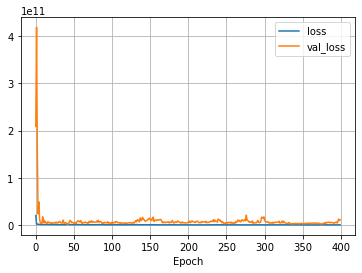

In [30]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

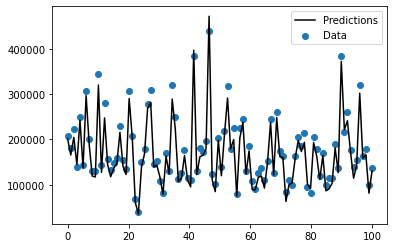

In [31]:
x = tf.linspace(0.0, 100, 100)
y = predicted[:100]

plt.scatter(x, train_y[:100], label='Data')
# plt.scatter(x, y, color='g', label='Predictions')
plt.plot(x, y, color='k', label='Predictions')
plt.xlabel('')
plt.ylabel('')
plt.legend()

In [32]:
test_predicted = model.predict(test.values)

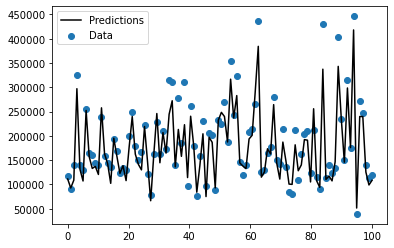

In [33]:
x = tf.linspace(0.0, 100, 100)
y = test_predicted[:100]

plt.scatter(x, test_y[:100], label='Data')
# plt.scatter(x, y, color='g', label='Predictions')
plt.plot(x, y, color='k', label='Predictions')
plt.xlabel('')
plt.ylabel('')
plt.legend()

test

In [34]:
test_data = pd.read_csv(os.path.join(root, 'test.csv'))

In [35]:
all_columns = set(test_data.columns)
numeric_columns = set(test_data.select_dtypes(include=np.number).columns)
categorical_columns = all_columns.difference(numeric_columns)
null_columns = [column for column in test_data[numeric_columns] if test_data[column].isnull().sum()>0]

In [36]:
test_dt = test_data.copy()
for column in categorical_columns:
    test_dt[column] = test_dt[column].fillna("NaN")

In [37]:
for column in categorical_columns:
    medians_by_column = data.groupby(column)['SalePrice'].median()
    sort_list = medians_by_column.sort_values().index.tolist()
    test_dt[column] = pd.Categorical(test_dt[column], categories=sort_list)
    test_dt.sort_values(column, inplace=True)
    test_dt[column] = test_dt[column].factorize()[0]
test_dt = test_dt.sort_values('Id')

In [38]:
for column in null_columns:
    column_median = test_dt[column].median()
    test_dt[column] = test_dt[column].fillna(column_median)

In [39]:
test_dt = test_dt.drop(columns=to_drop_columns)
test_dt -= test_dt.min()
test_dt /= test_dt.max()
test_dt

,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolQC,Fence,SaleType,SaleCondition
0,0.6,0.329609,0.184147,0.000000,0.333333,0.00,0.375000,0.125,0.75,0.666667,...,1.0,1.0,0.098315,0.000000,0.0,0.208333,0.0,0.5,0.666667,0.8
1,0.8,0.335196,0.232124,0.333333,0.333333,0.25,0.375000,0.375,0.75,0.666667,...,1.0,1.0,0.275983,0.048518,0.0,0.000000,0.0,0.0,0.666667,0.8
2,0.8,0.296089,0.224197,0.333333,0.333333,0.00,0.541667,0.375,0.75,1.000000,...,1.0,1.0,0.148876,0.045822,0.0,0.000000,0.0,0.5,0.666667,0.8
3,0.8,0.318436,0.154326,0.333333,0.333333,0.00,0.541667,0.375,0.75,1.000000,...,1.0,1.0,0.252809,0.048518,0.0,0.000000,0.0,0.0,0.666667,0.8
4,0.8,0.122905,0.064121,0.333333,1.000000,0.00,0.916667,0.375,1.00,0.666667,...,1.0,1.0,0.000000,0.110512,0.0,0.250000,0.0,0.0,0.666667,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.4,0.000000,0.008453,0.000000,0.333333,0.00,0.000000,0.375,0.50,1.000000,...,0.0,1.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.666667,0.8
1455,0.4,0.000000,0.007691,0.000000,0.333333,0.00,0.000000,0.375,1.00,1.000000,...,1.0,1.0,0.000000,0.032345,0.0,0.000000,0.0,0.0,0.666667,0.2
1456,0.8,0.776536,0.336115,0.000000,0.333333,0.00,0.458333,0.375,0.75,0.666667,...,1.0,1.0,0.332865,0.000000,0.0,0.000000,0.0,0.0,0.666667,0.2
1457,0.8,0.229050,0.162724,0.000000,0.333333,0.00,0.458333,0.375,0.75,0.500000,...,0.0,1.0,0.056180,0.043127,0.0,0.000000,0.0,0.5,0.666667,0.8


In [40]:
test2_predicted = model.predict(test_dt.values)

In [41]:
test2_predicted = test2_predicted.flatten().tolist()
answer = pd.DataFrame({'Id': range(1461, 2920), 'SalePrice': test2_predicted})
answer.to_csv(os.path.join(root, 'answer.csv'), index=False)